In [77]:
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas.io.json import json_normalize

# Live Journal Graph. Data is taken on https://snap.stanford.edu/data/index.html 

In [13]:
with open("/home/anastasiya/Documents/DataFromGraph/DataGraphLiveJournal.json", "r") as DataGraphFileLJ:
    LJdata = pd.read_json(DataGraphFileLJ, orient = 'records' )

ValueError: Expected object or value

In [103]:
LJdata

,Components,FollowersCount >,NodesAfter,NodesBeforeClean,SizeComponentsList
0,405,300,32283,4847571,"[31302, 281, 198, 53, 11, 7, 6, 5, 3, 3, 3, 3,..."
1,245,400,17428,4847571,"[16446, 281, 187, 89, 80, 59, 25, 5, 4, 4, 3, ..."
2,182,500,10134,4847571,"[9551, 270, 34, 33, 32, 26, 3, 3, 2, 2, 2, 2, ..."
3,164,600,6395,4847571,"[6172, 28, 17, 7, 6, 2, 2, 2, 2, 2, 2, 1, 1, 1..."
4,137,700,4240,4847571,"[4045, 34, 16, 6, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1..."
5,116,800,2965,4847571,"[2744, 77, 16, 10, 5, 2, 2, 1, 1, 1, 1, 1, 1, ..."
6,109,900,2159,4847571,"[1869, 117, 54, 8, 5, 2, 2, 1, 1, 1, 1, 1, 1, ..."
7,112,1000,1623,4847571,"[1395, 69, 44, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1..."
8,103,1100,1233,4847571,"[1072, 38, 21, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1..."
9,99,1200,966,4847571,"[836, 18, 13, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."


In [104]:
LJdata.rename(columns = {'FollowersCount >' : 'Followers', 'SizeComponentsList' : 'Size'}, inplace = True)

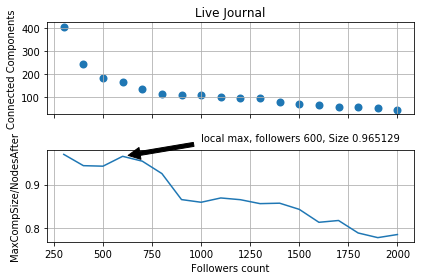

In [117]:
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, sharex=True)

ax1.scatter(LJdata['Followers'], LJdata['Components'], linewidth = 2.0)
# ax1.set_xlabel('Followers count')
ax1.set_ylabel('Connected Components')
ax1.set_title('Live Journal')
ax1.grid(True)

y = [float(LJdata['Size'][i][0])/float(LJdata['NodesAfter'][i]) for i in range(len(LJdata.index))]
y_max_i = y.index(max(y[1:]))
ax2.plot(LJdata['Followers'], y)
ax2.annotate('local max, followers %d, Size %f' %(LJdata['Followers'][y_max_i],max(y[1:])) , xy=(LJdata['Followers'][y_max_i], y[y_max_i]), xytext=(1000, 1),
             arrowprops=dict(facecolor='black', shrink=0.07),
             )
ax2.set_xlabel('Followers count')
ax2.set_ylabel('MaxCompSize/NodesAfter')    
ax2.grid(True)

ax3.plot(LJdata['Followers'], LJdata['NodesAfter'])

fig.tight_layout()

# Live Journal Graph. Data was recieved by Max Varlamov.

In [96]:
with open("/home/anastasiya/Documents/DataFromGraph/DataGraphLiveJournalVarlamov.json", "r") as DataGraphFileLJV:
    LJVdata1 = pd.read_json(DataGraphFileLJV, orient = 'records' )
with open('/home/anastasiya/PycharmProjects/Snap_1/Data/DataGraphLiveJournalVarlamov.json' , "r") as DataGraphFileLJV:
    LJVdata2 = pd.read_json(DataGraphFileLJV, orient = 'records')
with open ('/home/anastasiya/PycharmProjects/Snap_1/Main/DataGraphLiveJournalVarlamov.json', 'r') as DataGraphFileLJV:
    LJVdata3 = pd.read_json(DataGraphFileLJV, orient='records')
LJVdata2 = pd.concat([LJVdata2, LJVdata3], ignore_index=True, sort='FollowersLimit')
LJVdata2.sort_values('FollowersLimit')
LJVdata = pd.concat([LJVdata2, LJVdata1], ignore_index=True, sort='FollowersLimit').sort_values('FollowersLimit').reset_index().drop('index', axis=1)

In [97]:
LJVdata

,Components,FollowersLimit,NodesAfter,NodesBeforeClean,SizeComponentsList
0,132184,1,3384638,10852476,"[2999603, 2351, 1713, 1160, 985, 606, 585, 570..."
1,4167,10,436972,10852476,"[429654, 328, 174, 172, 168, 165, 143, 99, 98,..."
2,2311,20,192157,10852476,"[188619, 321, 120, 98, 97, 96, 96, 31, 19, 16,..."
3,1603,30,115827,10852476,"[113198, 161, 118, 99, 98, 97, 96, 96, 56, 36,..."
4,1403,50,57513,10852476,"[55938, 53, 13, 11, 8, 6, 5, 5, 5, 4, 4, 4, 4,..."
5,1418,100,19944,10852476,"[17986, 483, 15, 8, 7, 6, 4, 3, 3, 3, 2, 2, 2,..."
6,1304,150,9394,10852476,"[7964, 104, 7, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2..."
7,1097,200,6150,10852476,"[4940, 103, 7, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1..."
8,1082,300,3735,10852476,"[2647, 4, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
9,916,400,2645,10852476,"[1728, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


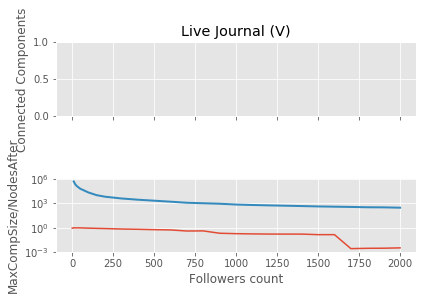

In [108]:
# LJVdata.drop(LJVdata.loc(), inplace = True)
#18,19,20,21,22,23,24
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, sharex=True)
# ax1.yscale('log')
# ax1.scatter(LJVdata['FollowersLimit'][1:], LJVdata['NodesAfter'][1:], linewidth = 2.0)
# ax1.set_xlabel('Followers count')
ax1.set_ylabel('Connected Components')
ax1.set_title('Live Journal (V)')
ax1.grid(True)

y = [float(LJVdata['SizeComponentsList'][i][0])/float(LJVdata['NodesAfter'][i]) for i in range(len(LJVdata.index))]
y_max_i = y.index(max(y[1:]))
ax2.plot(LJVdata['FollowersLimit'], y)
# ax2.annotate('local max, followers %d, Size %f' %(LJVdata['FollowersLimit'][y_max_i],max(y[1:])) , xy=(LJVdata['FollowersLimit'][y_max_i], y[y_max_i]), xytext=(1000, 1),
#              arrowprops=dict(facecolor='black', shrink=0.07),
#              )
ax2.set_xlabel('Followers count')
ax2.set_ylabel('MaxCompSize/NodesAfter')    
ax2.grid(True)

fig.tight_layout()
a = dict(zip(LJVdata['FollowersLimit'], y))
a
plt.yscale('log')
plt.plot( LJVdata['FollowersLimit'][1:], LJVdata['NodesAfter'][1:], linewidth = 2.0)

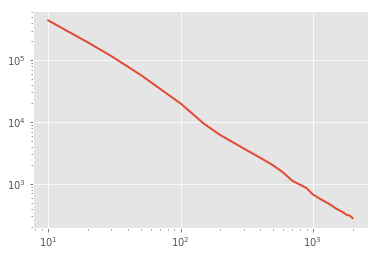

In [110]:
plt.xscale('log')
plt.yscale('log')
plt.plot( LJVdata['FollowersLimit'][1:], LJVdata['NodesAfter'][1:], linewidth = 2.0)

# VK social graph. Data was recieved by Max Varlamov. 2017 year

In [87]:
with open('/home/anastasiya/Documents/DataFromGraph/VKFriendsData/DataGraphVKAll.json', 'r') as DataGraphFileVK:
    VKdata2 = pd.read_json(DataGraphFileVK, orient = 'records' )
with open('/home/anastasiya/Documents/DataFromGraph/VKFriendsData/VkFriendsAnalisys2017.json', 'r') as DataGraphFileVK:
    VKdata3 = pd.read_json(DataGraphFileVK, orient = 'records' )
with open('/home/anastasiya/Documents/DataFromGraph/Vk.json', 'r') as DataGraphFileVK:
    VKdata4 = pd.read_json(DataGraphFileVK, orient = 'records' )    
VKdata4

,Components,FollowersLimit,NodesAfter,NodesBeforeClean,SizeComponentsList
0,85289,50,449781,342707897,"[96481, 24503, 14815, 12279, 5392, 5365, 4363,..."
1,46244,100,159894,342707897,"[26168, 6883, 4371, 3479, 1601, 1462, 1299, 12..."


In [88]:
with open('/home/anastasiya/Documents/DataFromGraph/VKFriendsData/DataGraphVKFullNew.json', 'r') as DataGraphFileVK:
    VKdata1 = pd.read_json(DataGraphFileVK, orient = 'records')
VKdata1

,Components,FollowersLimit,NodesAfter,NodesBeforeClean,SizeComponentsList
0,1581523,0,206811085,206811085,"[57566429, 15073005, 8515954, 7373120, 3596425..."


In [89]:
VKdata = pd.concat([VKdata1, VKdata4, VKdata3], ignore_index=True, sort='FollowersLimit').reset_index().drop('index', axis=1)

In [90]:
VKdata

,Components,FollowersLimit,NodesAfter,NodesBeforeClean,SizeComponentsList
0,1581523,0,206811085,206811085,"[57566429, 15073005, 8515954, 7373120, 3596425..."
1,85289,50,449781,342707897,"[96481, 24503, 14815, 12279, 5392, 5365, 4363,..."
2,46244,100,159894,342707897,"[26168, 6883, 4371, 3479, 1601, 1462, 1299, 12..."
3,21923,200,54952,342707897,"[1828, 1653, 1276, 972, 926, 899, 846, 473, 35..."
4,10084,400,19363,342707897,"[333, 304, 294, 290, 281, 207, 168, 112, 84, 8..."
5,7727,500,13851,342707897,"[223, 197, 193, 173, 116, 116, 64, 61, 57, 53,..."
6,4295,800,6702,342707897,"[86, 81, 79, 68, 67, 42, 36, 35, 33, 28, 28, 2..."
7,3185,1000,4748,342707897,"[67, 59, 58, 47, 45, 32, 27, 26, 25, 22, 21, 2..."
8,1753,1500,2359,342707897,"[28, 22, 20, 13, 13, 13, 11, 11, 11, 11, 10, 9..."
9,1340,1800,1680,342707897,"[18, 16, 10, 10, 10, 10, 9, 8, 8, 7, 7, 7, 6, ..."


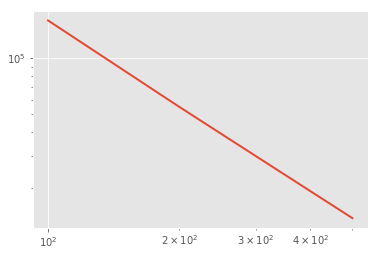

In [111]:
plt.xscale('log')
plt.yscale('log')
plt.plot( VKdata['FollowersLimit'][1:], VKdata['NodesAfter'][1:], linewidth = 2.0)

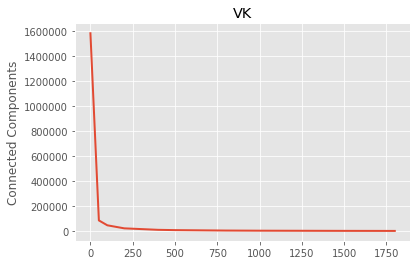

In [91]:
# fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, sharex=True)

plt.plot(VKdata['FollowersLimit'], VKdata['Components'], linewidth = 2.0)
# ax1.set_xlabel('Followers count')
plt.ylabel('Connected Components')
plt.title('VK')
plt.grid(True)

{0: 0.2783527246617366,
 50: 0.21450661544173721,
 100: 0.16365842370570502,
 200: 0.03326539525403989,
 400: 0.017197748282807415,
 500: 0.01609992058335138,
 800: 0.012831990450611758,
 1000: 0.014111204717775905,
 1500: 0.011869436201780416,
 1800: 0.010714285714285714}

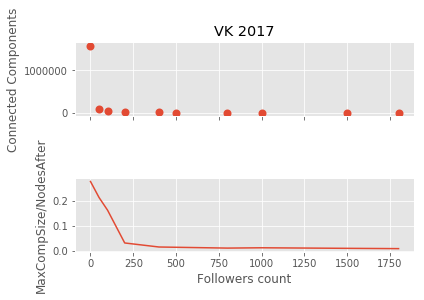

In [92]:
# LJVdata.drop(LJVdata.loc(), inplace = True)
#18,19,20,21,22,23,24
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, sharex=True)

ax1.scatter(VKdata['FollowersLimit'], VKdata['Components'], linewidth = 2.0)
# ax1.set_xlabel('Followers count')
ax1.set_ylabel('Connected Components')
ax1.set_title('VK 2017')
ax1.grid(True)

y = [float(VKdata['SizeComponentsList'][i][0])/float(VKdata['NodesAfter'][i]) for i in range(len(VKdata.index))]
y_max_i = y.index(max(y[1:]))
ax2.plot(VKdata['FollowersLimit'], y)
# ax2.annotate('local max, followers %d, Size %f' %(LJVdata['FollowersLimit'][y_max_i],max(y[1:])) , xy=(LJVdata['FollowersLimit'][y_max_i], y[y_max_i]), xytext=(1000, 1),
#              arrowprops=dict(facecolor='black', shrink=0.07),
#              )
ax2.set_xlabel('Followers count')
ax2.set_ylabel('MaxCompSize/NodesAfter')    
ax2.grid(True)

fig.tight_layout()
a = dict(zip(VKdata['FollowersLimit'], y))
a

In [93]:
VKdata = pd.concat([VKdata4, VKdata3], ignore_index=True, sort='FollowersLimit').reset_index().drop('index', axis=1)
VKdata

,Components,FollowersLimit,NodesAfter,NodesBeforeClean,SizeComponentsList
0,85289,50,449781,342707897,"[96481, 24503, 14815, 12279, 5392, 5365, 4363,..."
1,46244,100,159894,342707897,"[26168, 6883, 4371, 3479, 1601, 1462, 1299, 12..."
2,21923,200,54952,342707897,"[1828, 1653, 1276, 972, 926, 899, 846, 473, 35..."
3,10084,400,19363,342707897,"[333, 304, 294, 290, 281, 207, 168, 112, 84, 8..."
4,7727,500,13851,342707897,"[223, 197, 193, 173, 116, 116, 64, 61, 57, 53,..."
5,4295,800,6702,342707897,"[86, 81, 79, 68, 67, 42, 36, 35, 33, 28, 28, 2..."
6,3185,1000,4748,342707897,"[67, 59, 58, 47, 45, 32, 27, 26, 25, 22, 21, 2..."
7,1753,1500,2359,342707897,"[28, 22, 20, 13, 13, 13, 11, 11, 11, 11, 10, 9..."
8,1340,1800,1680,342707897,"[18, 16, 10, 10, 10, 10, 9, 8, 8, 7, 7, 7, 6, ..."


{50: 0.2783527246617366,
 100: 0.21450661544173721,
 200: 0.16365842370570502,
 400: 0.03326539525403989,
 500: 0.017197748282807415}

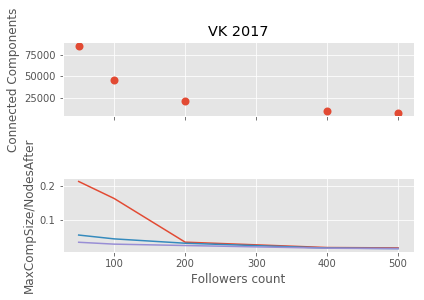

In [94]:
VKdata.drop([5,6,7,8], inplace = True)

fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, sharex=True)

ax1.scatter(VKdata['FollowersLimit'], VKdata['Components'], linewidth = 2.0)
# ax1.set_xlabel('Followers count')
ax1.set_ylabel('Connected Components')
ax1.set_title('VK 2017')
ax1.grid(True)

y0 = [float(VKdata['SizeComponentsList'][i][0])/float(VKdata['NodesAfter'][i]) for i in range(len(VKdata.index))]
y1 = [float(VKdata['SizeComponentsList'][i][1])/float(VKdata['NodesAfter'][i]) for i in range(len(VKdata.index))]
y2 = [float(VKdata['SizeComponentsList'][i][2])/float(VKdata['NodesAfter'][i]) for i in range(len(VKdata.index))]
y_max_i = y.index(max(y[1:]))
ax2.plot(VKdata['FollowersLimit'], y0, label='components1')
ax2.plot(VKdata['FollowersLimit'], y1)
ax2.plot(VKdata['FollowersLimit'], y2)
# ax2.annotate('local max, followers %d, Size %f' %(LJVdata['FollowersLimit'][y_max_i],max(y[1:])) , xy=(LJVdata['FollowersLimit'][y_max_i], y[y_max_i]), xytext=(1000, 1),
#              arrowprops=dict(facecolor='black', shrink=0.07),
#              )
ax2.set_xlabel('Followers count')
ax2.set_ylabel('MaxCompSize/NodesAfter') 
ax2.grid(True)

fig.tight_layout()
a = dict(zip(VKdata['FollowersLimit'], y))
a

# VK social graph. Data was recieved by Max Varlamov. 2016 year

In [156]:
with open('/home/anastasiya/Documents/DataFromGraph/VKFriendsData/VkFriendsAnalisys2016.json', 'r') as DataGraphFileVK:
    VKdata1 = pd.read_json(DataGraphFileVK, orient = 'records' )
with open('/home/anastasiya/Documents/DataFromGraph/VKFriendsData/VkFullFriendsAnalisys2016.json', 'r') as DataGraphFileVK:
    VKdata2 = pd.read_json(DataGraphFileVK, orient = 'records' )
Vkdata = pd.concat([VKdata2,VKdata1], ignore_index=True, sort='FollowersLimit').reset_index().drop('index', axis=1)

In [157]:
Vkdata

,Components,FollowersLimit,NodesAfter,NodesBeforeClean,SizeComponentsList
0,1465802,Full,188123975,188123975,"[35705624, 8046681, 7808898, 5311287, 4233653,..."
1,20423,200,49431,188123975,"[1420, 979, 818, 816, 580, 469, 385, 360, 359,..."
2,9307,400,17341,188123975,"[357, 278, 274, 135, 122, 86, 85, 80, 75, 74, ..."
3,7141,500,12331,188123975,"[242, 194, 189, 109, 90, 60, 60, 52, 52, 51, 4..."
4,3978,800,6030,188123975,"[96, 94, 66, 60, 46, 32, 32, 32, 29, 25, 24, 2..."
5,2962,1000,4233,188123975,"[65, 51, 50, 46, 27, 26, 21, 21, 21, 19, 18, 1..."


Многие сложные системы демонстрируют удивительную степень устойчивости к ошибкам. Многие примеры мы можем наблюдать в природе, даже у простых организмов, что обьясняется устоичивостью их метаболической сети.Так же и коммуникационные сети очень толерантны к ошибкам. Пусть отказ пользователя в передачи информации - ошибка. Сохранит ли сеть свои коммуникационные свойста, если удалять из сети относительно не влиятельных пользователей?

Итак, я планирую сегодня рассказать в первую очередь о цели нашего исследования, затем дать небольшое введение в актуальность проблемы, исследования в мире и расссказать об инструментах, которые мы использовали для нашей задачи. После я постановлю задачу и расскажу подробно о полученных результатах и итогах. А после кратко наметим планы.

Цель....
От чего мы отталкивались и что уже сделано научным сообществом.

Сети: экспоненциальные - модель случайных графов Эрдёша и Реньи
scale-free - 


Существующие эмпирические и теоретические результаты показывают, что сложные сети можно разделить на два основных класса на основе их распределение степеней P (k) (определяется как доля узлов, имеющих степень k). Первый класс принято называть экспонциальным (модель случайных графов Эрдёша и Реньи), а второй scale-free (интернет, социальные сети). Если готовить о распредлеении степеней в этих сетях, то в экспонциальной это порядка: а в scale-free: $P(k) \~ k^{−c}$

Тогда становится понятно, что удаляя вершины из экспоненциальной сети, диаметр будет сильно увиеличиваться, посколько все узлы вносят примерно одинаковый вклад. А в случае scale-free должно быть иначе, удаляя случайным образом вершины (порядка 5%), диаметр графа практически не меняется. После чего эмпирически доказали, что удаляя только влиятельных пользователей, граф быстро распадается (диаметр удваивается, если 5% узлов будут удалены). 

Тогда как будет вести себя scale-free сеть, если удалять только не влиятельных пользователей.


На данный момент есть модель генирации scale-free сетей. Принцип ее работы: Создается m0 узлов. На каждом временном шаге $t$ вводится новый узел, который связан с m уже существующих узлов. Вероятность $P_i$ того, что новый узел подключен к узлу $i$, зависит от связности $k_i$ этого узла, так что $P_i = k_i / \sum_j k_j$. Для больших $t$ распределение связности является степенным законом, следующим образом $P(k) = 2m^2 / k^3$


Cоциальные сети с более чем шестью миллиардами человек имеют диаметр около шести, а значит сеть довольно сильно связана.